<a href="https://colab.research.google.com/github/nallagondu/pytorch-tutorial/blob/master/PytorchTensors_UAT03_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##NumPy Bridge

In the section above on broadcasting, it was mentioned that PyTorch’s broadcast semantics are compatible with NumPy’s - but the kinship between PyTorch and NumPy goes even deeper than that.

If you have existing ML or scientific code with data stored in NumPy ndarrays, you may wish to express that same data as PyTorch tensors, whether to take advantage of PyTorch’s GPU acceleration, or its efficient abstractions for building ML models. It’s easy to switch between ndarrays and PyTorch tensors:

In [ ]:
import numpy as np
import torch

numpy_array = np.ones((2, 3))
print(numpy_array)

pytorch_tensor = torch.from_numpy(numpy_array)
print(pytorch_tensor)

PyTorch creates a tensor of the same shape and containing the same data as the NumPy array, going so far as to keep NumPy’s default 64-bit float data type.

The conversion can just as easily go the other way:

In [ ]:
pytorch_rand = torch.rand(2, 3)
print(pytorch_rand)

numpy_rand = pytorch_rand.numpy()
print(numpy_rand)

In [ ]:
numpy_array[1, 1] = 23
print(pytorch_tensor)

pytorch_rand[1, 1] = 17
print(numpy_rand)

https://pytorch.org/tutorials/beginner/introyt/autogradyt_tutorial.html



PyTorch’s Autograd feature is part of what make PyTorch flexible and fast for building machine learning projects. It allows for the rapid and easy computation of multiple partial derivatives (also referred to as gradients) over a complex computation. This operation is central to backpropagation-based neural network learning.

The power of autograd comes from the fact that it traces your computation dynamically at runtime, meaning that if your model has decision branches, or loops whose lengths are not known until runtime, the computation will still be traced correctly, and you’ll get correct gradients to drive learning. This, combined with the fact that your models are built in Python, offers far more flexibility than frameworks that rely on static analysis of a more rigidly-structured model for computing gradients.


 is a single-valued scalar function of the model’s output. This function expresses how far off our model’s prediction was from a particular input’s ideal output. Note: After this point, we will often omit the vector sign where it should be contextually clear - e.g.,
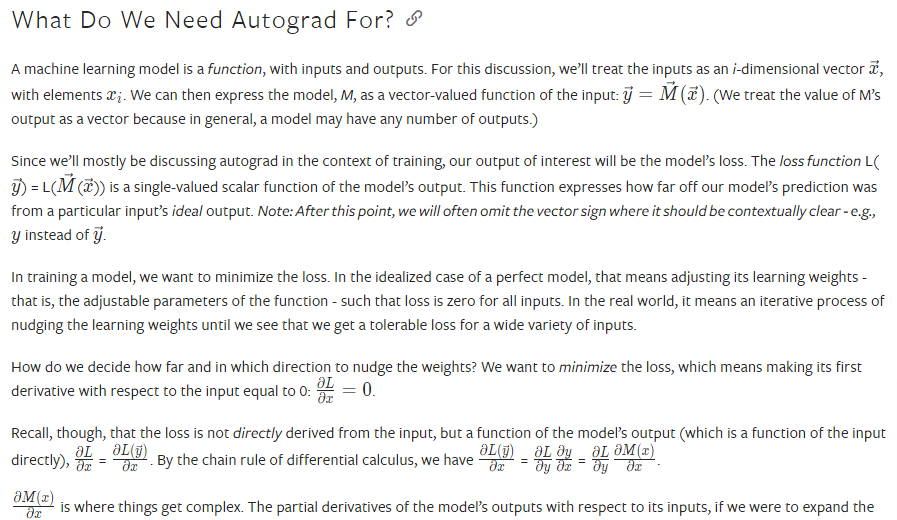

 if we were to expand the expression using the chain rule again, would involve many local partial derivatives over every multiplied learning weight, every activation function, and every other mathematical transformation in the model. The full expression for each such partial derivative is the sum of the products of the local gradient of every possible path through the computation graph that ends with the variable whose gradient we are trying to measure.

In particular, the gradients over the learning weights are of interest to us - they tell us what direction to change each weight to get the loss function closer to zero.

Since the number of such local derivatives (each corresponding to a separate path through the model’s computation graph) will tend to go up exponentially with the depth of a neural network, so does the complexity in computing them. This is where autograd comes in: It tracks the history of every computation. Every computed tensor in your PyTorch model carries a history of its input tensors and the function used to create it. Combined with the fact that PyTorch functions meant to act on tensors each have a built-in implementation for computing their own derivatives, this greatly speeds the computation of the local derivatives needed for learning.

In [ ]:
# %matplotlib inline

import torch

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math

In [ ]:
a = torch.linspace(0., 2. * math.pi, steps=25, requires_grad=True)
print(a)

In [ ]:
#Next, we’ll perform a computation, and plot its output in terms of its inputs:

b = torch.sin(a)
plt.plot(a.detach(), b.detach())

In [ ]:
print(b)

In [ ]:
BATCH_SIZE = 16
DIM_IN = 1000
HIDDEN_SIZE = 100
DIM_OUT = 10

class TinyModel(torch.nn.Module):

    def __init__(self):
        super(TinyModel, self).__init__()

        self.layer1 = torch.nn.Linear(DIM_IN, HIDDEN_SIZE)
        self.relu = torch.nn.ReLU()
        self.layer2 = torch.nn.Linear(HIDDEN_SIZE, DIM_OUT)

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        return x

some_input = torch.randn(BATCH_SIZE, DIM_IN, requires_grad=False)
ideal_output = torch.randn(BATCH_SIZE, DIM_OUT, requires_grad=False)

model = TinyModel()

In [ ]:
print(model.layer2.weight[0][0:10]) # just a small slice
print(model.layer2.weight.grad)

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

prediction = model(some_input)

loss = (ideal_output - prediction).pow(2).sum()
print(loss)